# THE SPARKS FOUNDATION

## Graduate Rotational Internship Program

***Data Science And Business Analytics Tasks***

### Author: SARAVANAVEL


**TASK 5 - Exploratory Data Analysis - Sports**

* Problem Statement: Perform Exploratory Data Analysis on 'Indian Premiere League'.
* As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.


Exploratory Data Analysis Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.



## Importing libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
%matplotlib inline
import metrics
import warnings
warnings.filterwarnings("ignore")

## Loading Datasets

In [2]:
matches = pd.read_csv("C:/GRIP/matches.csv")
deliveries = pd.read_csv("C:/GRIP/deliveries.csv")

## Exploring matches dataset

In [3]:
# Shape of Dataset
matches.shape

(756, 18)

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Null value checking

In [5]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
# As city has missing values so we try to fill it by using venue
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [7]:
matches.city = matches.city.fillna('Dubai')


In [8]:
# Replacing umpire1 and umpire2 null values with None 
matches['umpire1'].fillna('None',inplace=True)
matches['umpire2'].fillna('None',inplace=True)


In [9]:
# Since umpire3 has too many null values we drop it.
matches=matches.drop(columns=["umpire3"],axis=1)

In [10]:
matches.head(5)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,None,None


## Exploring Deliveries Dataset

In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
# Shape of Dataset
deliveries.shape

(179078, 21)

In [13]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Total description of data

In [14]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Observations -


##### *The .csv file has data of ipl matches starting from the season 2008 to 2019.
*The biggest margin of victory for the team batting first(win by runs) is 146.
*75% of the victorious teams that bat first won by the margin of 19 runs and second won by a margin of 6 wickets.
*The biggest victory of the team batting second(win by wickets) is by 10 Wickets.
*There were 756 Ipl matches hosted from 2008 to 2019.



In [15]:
# Dataset Statistical Description
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Exploratory Data Analysis 

In [16]:
print('\nTotal number of IPL-Seasons played: ',  matches.season.nunique())
print('\nList of Teams played in IPL :\n ',np.unique(matches[['team1','team2']].values))


Total number of IPL-Seasons played:  12

List of Teams played in IPL :
  ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [17]:
print('Total number of MATCHES PLAYED :',len(deliveries['match_id'].unique()))
print('Total number of RUNS SCORED by the batsman :',deliveries.total_runs.sum())
print('Total number of WIDE RUNS :',deliveries.wide_runs.sum())
print('Total number of NO-BALL RUNS :',deliveries.noball_runs.sum())
print('Total number of BYE RUNS :',deliveries.bye_runs.sum())
print('Total number of LEG-BYE RUNS :',deliveries.legbye_runs.sum())
print('Total number of PENALTY RUNS :',deliveries.penalty_runs.sum())
print('Total number of BATSMAN RUNS :',deliveries.batsman_runs.sum())
print('Total number of SUPER OVERS :',deliveries[deliveries.is_super_over==1].match_id.nunique())                                  

Total number of MATCHES PLAYED : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of BYE RUNS : 884
Total number of LEG-BYE RUNS : 3785
Total number of PENALTY RUNS : 10
Total number of BATSMAN RUNS : 223286
Total number of SUPER OVERS : 7


# Number of matches played in each season 

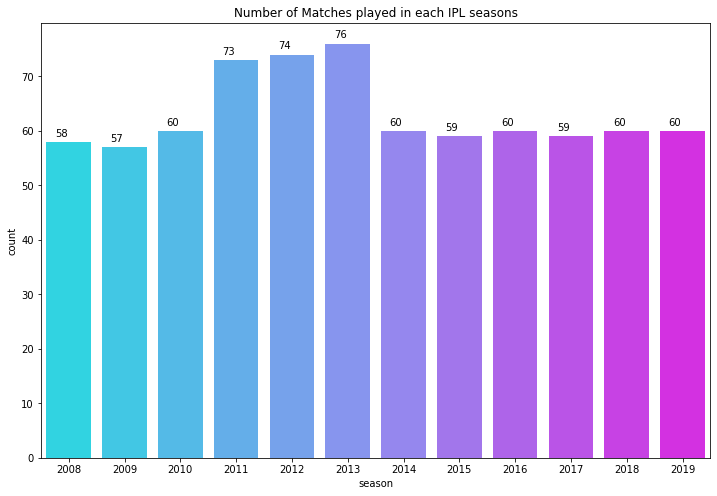

In [19]:
plt.figure(figsize=(12,8))
plt.title('Number of Matches played in each IPL seasons')
ax=sns.countplot(x=matches.season, palette="cool")
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Top 10 Man of the Match 

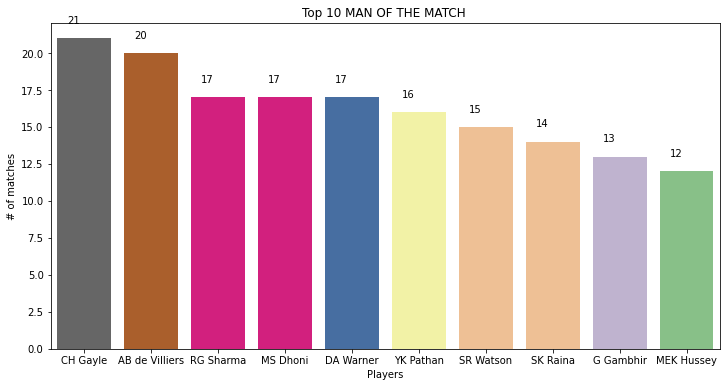

In [20]:
plt.figure(figsize=(12,6))
plt.title('Top 10 MAN OF THE MATCH ')
ax=sns.countplot(x=matches.player_of_match,order = matches.player_of_match.value_counts()[:10].index, palette="Accent_r")
ax.set_ylabel('# of matches')
ax.set_xlabel('Players')
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Number of Matches won by Each IPL Team

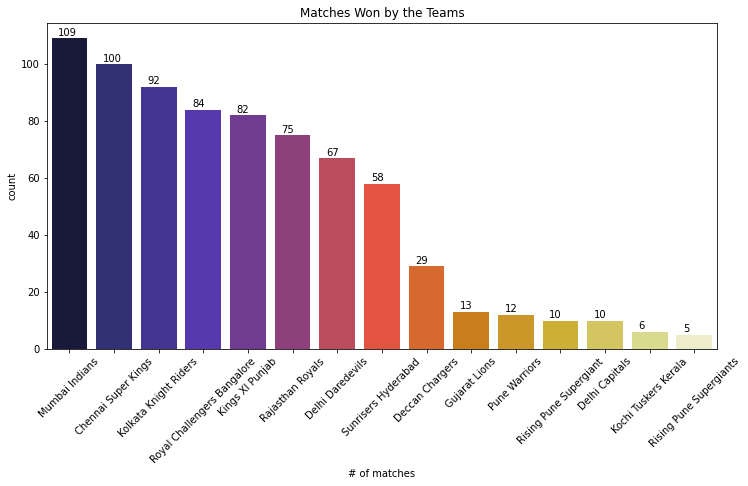

In [21]:
plt.figure(figsize=(12,6))
plt.title('Matches Won by the Teams')
ax=sns.countplot(x=matches['winner'],order = matches['winner'].value_counts().index, palette = 'CMRmap')
ax.set_xlabel('# of matches')
plt.xticks(rotation=45)
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [22]:
total_matches= pd.concat([matches.team1,matches.team2])
total_matches = total_matches.value_counts().reset_index()
total_matches.columns = ['Team','Total_Matches']
won_team = matches.winner.value_counts().reset_index()
won_team.columns = ['Team','Matches_won']
win_data= won_team[['Team','Matches_won']].merge(total_matches, left_on = 'Team', right_on = 'Team', how = 'right')
win_data['win_percent'] =  round((win_data.Matches_won/win_data['Total_Matches'])*100,1)

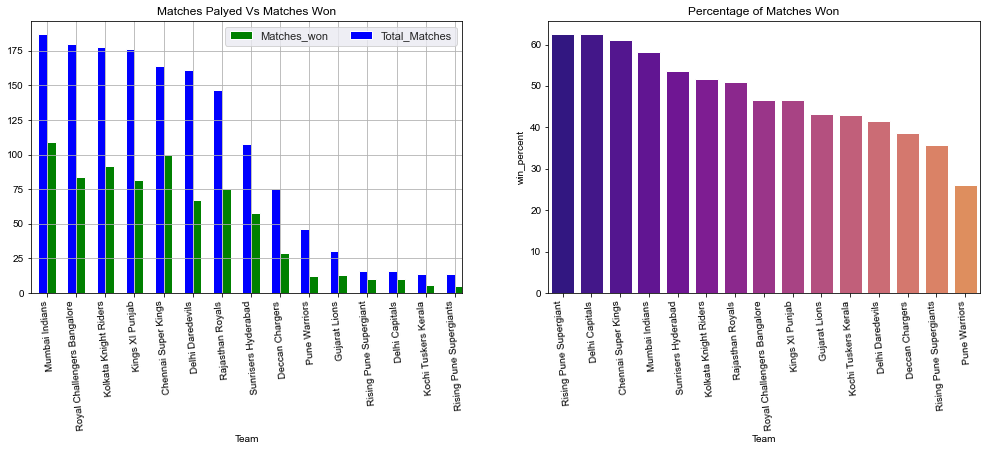

In [23]:
fig, ax =plt.subplots(1,2,figsize=(17,5))
sns.set()
df = win_data.set_index('Team')
width=0.3
df.Matches_won.plot(kind='bar',color='green',ax=ax[0],width=width, position=0)
df.Total_Matches.plot(kind='bar',color='blue',width = width,position=1,ax=ax[0])
ax[0].legend(ncol = 2, loc = 'upper right')
sns.barplot(y='win_percent',x='Team',data=win_data[['Team','win_percent']].sort_values(by='win_percent',ascending=False)
                 ,palette=sns.color_palette('plasma',20),ax=ax[1])
ax[0].tick_params('x', labelrotation=95)
ax[1].tick_params('x', labelrotation=95)
ax[0].set_title('Matches Palyed Vs Matches Won')
ax[1].set_title('Percentage of Matches Won')
plt.show()

In [24]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

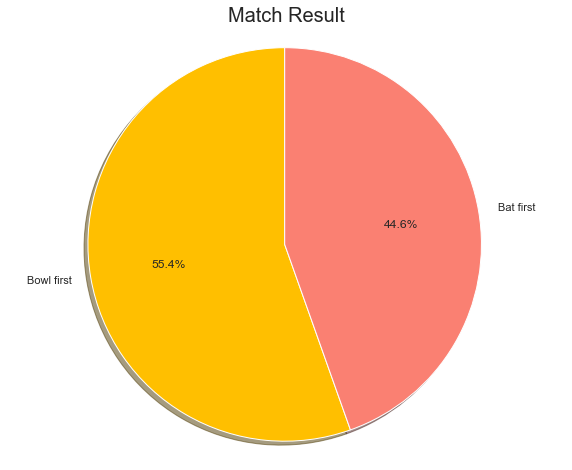

In [25]:
Win=matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

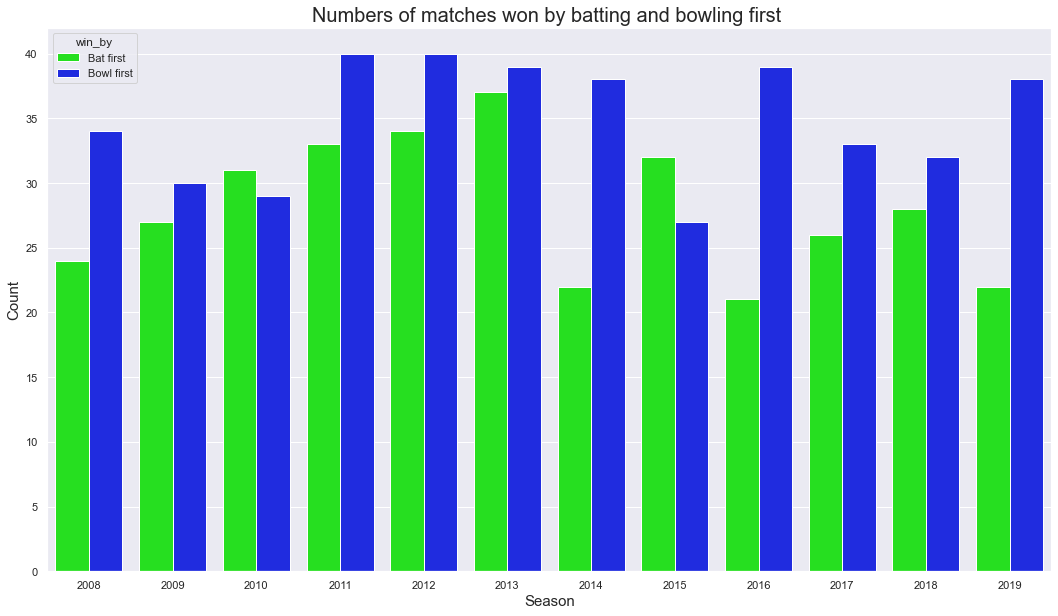

In [26]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=matches,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

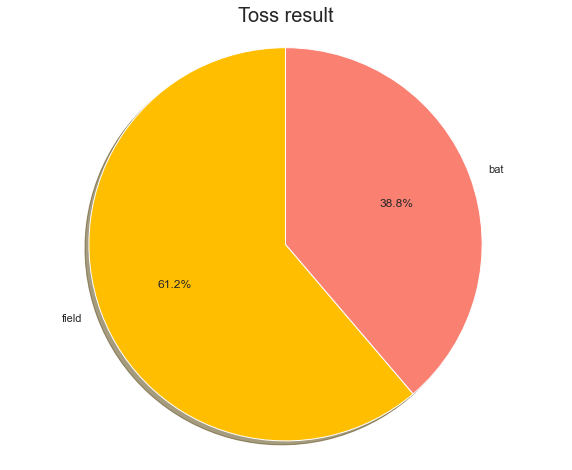

In [27]:
# we will plot pie chart on Toss decision
Toss=matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

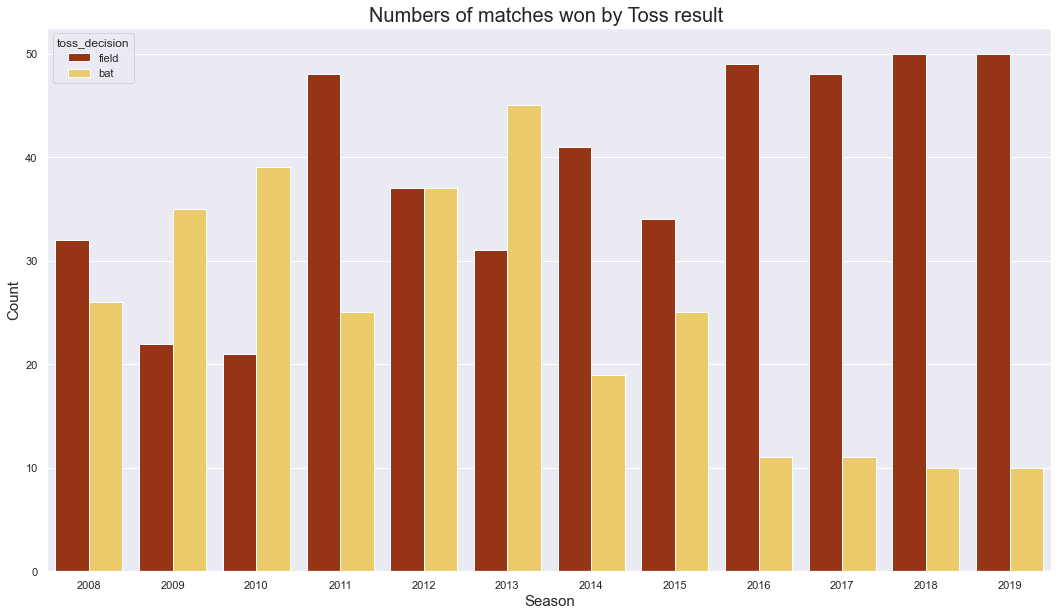

In [28]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=matches,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [29]:
# we will print winner season wise
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
 
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


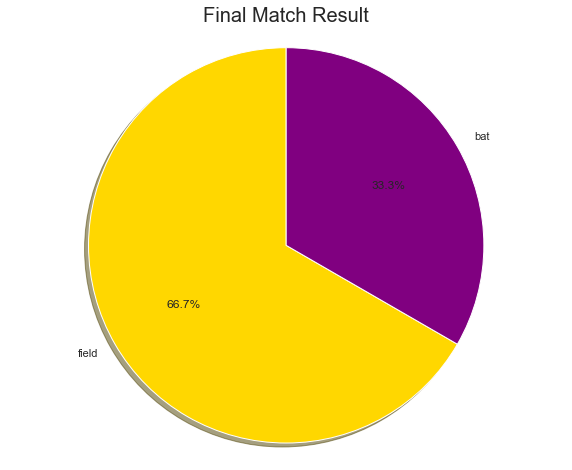

In [30]:
# we will plot pie chart on Winning percentage in finals
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Final Match Result',fontsize=20)
plt.axis('equal')
plt.show()

<Figure size 1440x720 with 0 Axes>

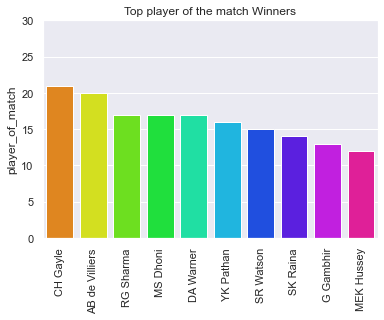

In [32]:
# we will print name of top player in IPL
plt.figure(figsize = (20,10))
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,30])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

# Most utilized venues 

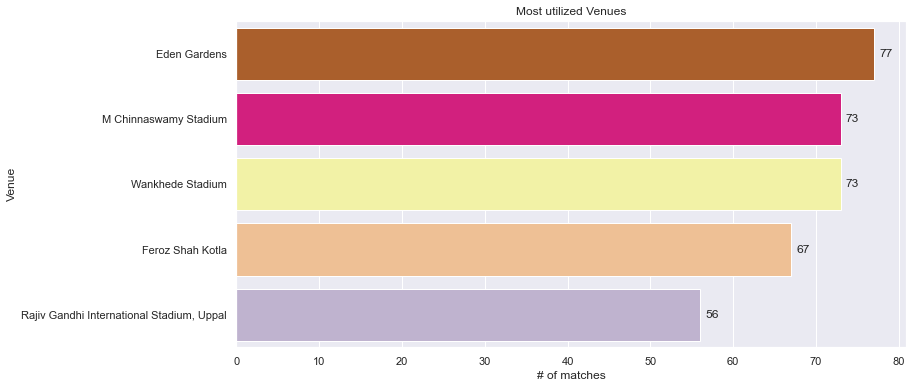

In [33]:
plt.figure(figsize=(12,6))
plt.title('Most utilized Venues')
ax=sns.countplot(y=matches['venue'],order = matches['venue'].value_counts()[0:5].index, palette="Accent_r")
ax.set_xlabel('# of matches')
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_ylabel('Venue')
plt.show()

In [34]:
# IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [35]:
# Number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [36]:
# print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [37]:
# man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [38]:
batsman_score = deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
batsman_score = batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Run Scorers in IPL")
batsman_score.iloc[:10,:]

Top 10 Run Scorers in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [39]:

wicket_data=deliveries.dropna(subset= ['dismissal_kind'] )
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
print("Top 10 Wicket Takers in IPL")
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',
        ascending=False).reset_index(drop=True).iloc[:10,:]

Top 10 Wicket Takers in IPL


,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Most Numbers of Fours Hit by Batsman in IPL

In [40]:
season=matches[['id','season','winner']]
merge=deliveries.merge(season,how='inner',left_on='match_id',right_on='id')
delivery_metrics= matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

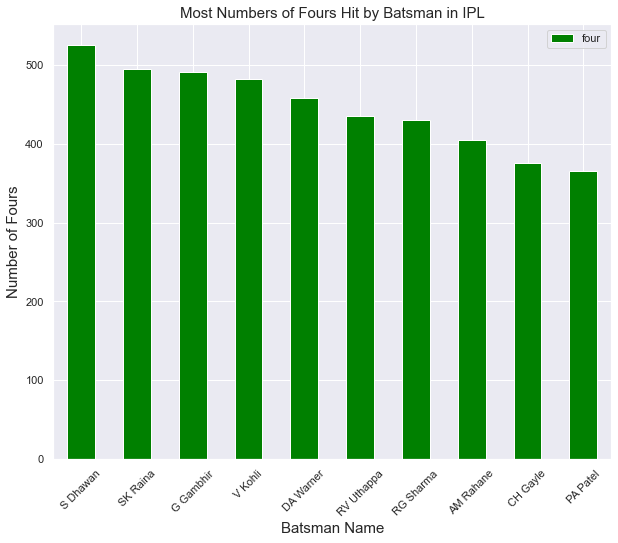

In [42]:
fours=merge[merge['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg([('runs by four','sum'),('gours','count')])
four_player = fours.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=four_player.iloc[:10,:].plot('batsman','four',kind='bar',color='green', figsize=(10,8))
plt.title("Most Numbers of Fours Hit by Batsman in IPL",fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Batsman Name",fontsize=15)
plt.ylabel("Number of Fours",fontsize=15)
plt.show()

## Numbers of Sixes Hit by Batsman

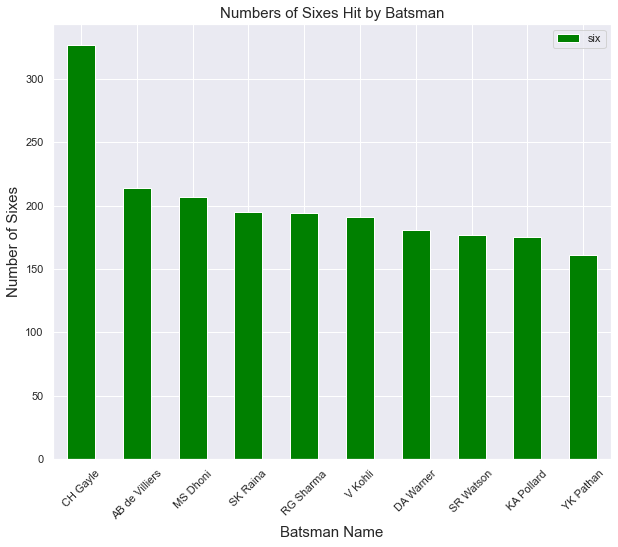

In [43]:
sixes=merge[merge['batsman_runs']==6]
sixes.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])
six_player = sixes.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=six_player.iloc[:10,:].plot('batsman','six',kind='bar',color='green', figsize=(10,8))
plt.title("Numbers of Sixes Hit by Batsman",fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Batsman Name",fontsize=15)
plt.ylabel("Number of Sixes",fontsize=15)
plt.show()

## PURPLE CAP in IPL

['DL Chahar'] won the PURPLE CAP in IPL-  2019


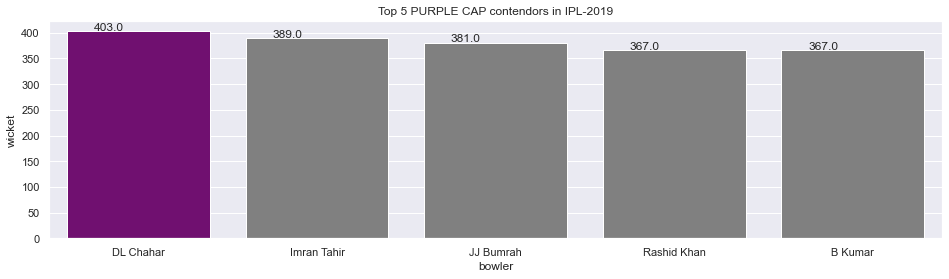

In [43]:
def purple_cap(season):
        high_wickettaker_all=delivery_metrics[delivery_metrics.player_dismissed !=0]
        purple_cap = high_wickettaker_all[high_wickettaker_all.season==season]
        purple_cap = purple_cap.bowler.value_counts().reset_index()
        purple_cap.columns = ['bowler','wicket']
      #purple_cap.head(5)
        plt.subplots(figsize=(16,4))
        plt.title('Top 5 PURPLE CAP contendors in IPL-'+str(season))
        values = purple_cap.wicket[:5]
        print(str(list(purple_cap.bowler[:1]))+' won the PURPLE CAP in IPL- ',str(season))
        clrs = ['grey' if (x < max(values)) else 'purple' for x in values ]
        ax=sns.barplot(x='bowler', y='wicket',data=purple_cap[:5], palette=clrs) # color=clrs)
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
        plt.show()
purple_cap(2019)

## ORANGE CAP contendors in IPL

['DA Warner'] won the ORANGE CAP in IPL-  2019


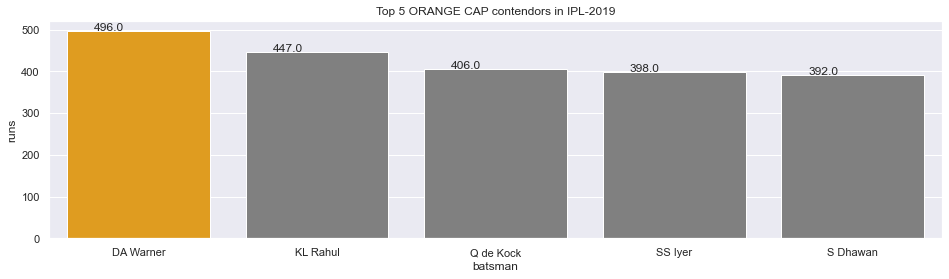

In [44]:
def orange_cap(season):
    orange_cap = delivery_metrics[delivery_metrics.season==season]
    orange_cap = orange_cap.batsman.value_counts().reset_index()
    orange_cap.columns = ['batsman','runs']
    #print(orange_cap.head(5))
    plt.subplots(figsize=(16,4))
    plt.title('Top 5 ORANGE CAP contendors in IPL-'+str(season))
    values = orange_cap.runs[:5]
    print(str(str(orange_cap.batsman[:1].values))+' won the ORANGE CAP in IPL- ',season)
    clrs = ['grey' if (x < max(values)) else 'Orange' for x in values ]
    ax=sns.barplot(x='batsman', y='runs',data=orange_cap[:5], palette=clrs) # color=clrs)
    for p in ax.patches:
          ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    plt.show()
orange_cap(2019)

In [45]:
# print the top 10 leading run scorer in IPL
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


## Most RUNS across IPL

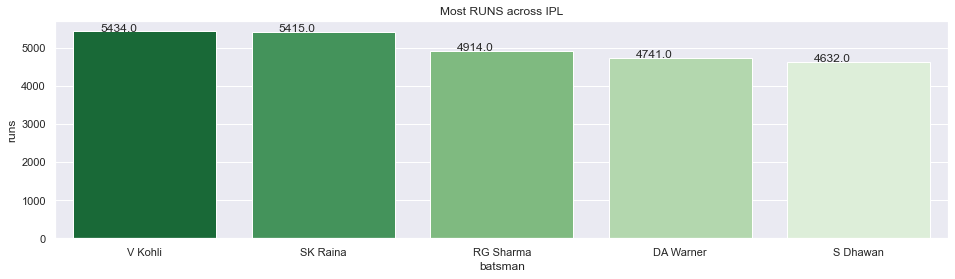

In [46]:
innings = deliveries.groupby('batsman')['match_id'].nunique().reset_index()
bat=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
bat = innings.merge(bat,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(runs,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'match_id':'Innings','ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
bat['strike_rate']=np.round(bat['ball_y']/bat['ball_x']*100,2)
bat['bat_average'] = np.round((bat.ball_y/bat.Innings),2)
bat=bat.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman'])['batsman_runs'].max().reset_index()
bat=bat.merge(compare,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batsman_runs':'Highest_score'},axis=1,inplace=True)
batsman=bat[1:].sort_values('runs',ascending=False).head(10)
batsman.style.background_gradient(cmap="YlGn")

plt.subplots(figsize=(16,4))
plt.title("Most RUNS across IPL")
batsman = batsman.sort_values("runs",ascending=False)
ax = sns.barplot(y="runs",x='batsman',data=batsman[:5],palette=sns.color_palette('Greens_r',5))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

# Average runs per match across seasons

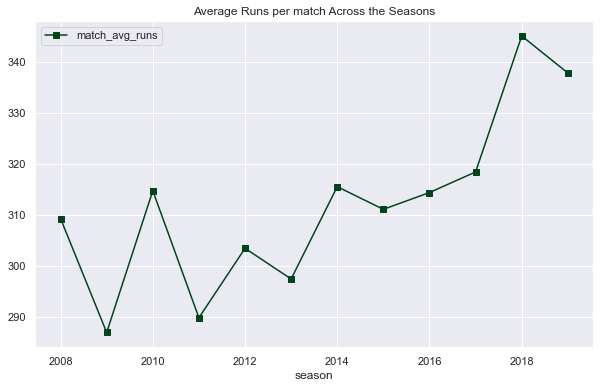

In [47]:
delivery_metrics= matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
x = delivery_metrics.groupby('batting_team')['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs'].sum()
x.style.background_gradient(cmap='coolwarm')

temp = delivery_metrics.groupby(['season','match_id'])['total_runs'].sum().reset_index() #.drop('match_id')
temp.columns = ['season','match_id','match_avg_runs']
temp = temp.groupby('season')['match_avg_runs'].mean().reset_index()
cm = plt.cm.get_cmap('hot')
temp.set_index('season').plot(marker='s',colormap='Greens_r')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match Across the Seasons')
plt.show()

In [48]:
# we will print no of sixes hit by team
six_data=deliveries[deliveries['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


In [49]:
# numbers of fours hit by team
four_data=deliveries[deliveries['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


# Conclusion

### ***- The highest number of match played in IPL season was 2011,2012,2013.***
### ***- The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.***
### ***- Teams which Bowl first has higher chances of winning then the team which bat first.***
### ***- After winning toss more teams decide to do fielding first.***
### ***- In finals teams which decide to do fielding first win the matches more then the team which bat first.***
### ***- In finals most teams after winning toss decide to do fielding first.***
### ***- It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.***
### ***- The highest number of four hit by player is Shikar Dhawan.***
### ***- The highest number of six hit by player is CH gayle.***
### ***-Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.***
### ***- The highest number of matches played by player name are SK Raina, RG Sharma.***
### ***- The IPL most wicket taken blower is SL Malinga.***
### ***- Mumbai Indians is the team which won by maximum and minimum runs.***
### ***- Kolkata Knight Riders is the team which won by maximum and minimum wickets.***


# **THANK YOU!!!!**
